## Node Pairing Between Two Surfaces Example

### Reading and Pairing
Example showing how to read in nodal file location files output from APDL and the process of "pairing" two sets of nodes from two different surfaces

In [1]:
import pandas as pd
from lib.pair_component_nodes import LSANodePairer
from pathlib import WindowsPath
import numpy as np

#files & paths
DPATH = WindowsPath('data')
TOP_SURFACE_NODE_FILE = 'ts.node.loc'           #the nodes on the top surface, 3D locations indexed on node tag
BOTTOM_SURFACE_NODE_FILE = 'bs.node.loc'        #the nodes on the bottom surface

#read in the node files
top_surface_nodes = pd.read_csv(DPATH.joinpath(TOP_SURFACE_NODE_FILE),index_col = 0,header = None)
top_surface_nodes.index = top_surface_nodes.index.astype(int)

bottom_surface_nodes = pd.read_csv(DPATH.joinpath(BOTTOM_SURFACE_NODE_FILE),index_col = 0,header = None)
bottom_surface_nodes.index = bottom_surface_nodes.index.astype(int)

#pair nodes using linear sum assignment algorithm from scipy
node_pair = LSANodePairer.from_locations(top_surface_nodes,
                                        bottom_surface_nodes)

paired_loc = node_pair.pair()

loc1 = top_surface_nodes.loc[paired_loc[:,0]]
loc2 = bottom_surface_nodes.loc[paired_loc[:,1]]
np.save(str(DPATH.joinpath('paired.npy')),paired_loc)


### Visualization
let's take a look at what we just did. The below plot shows bottom surface nodes in orange, and top surface nodes in cyan, with the pairings drawn as black arrows between the two sets.

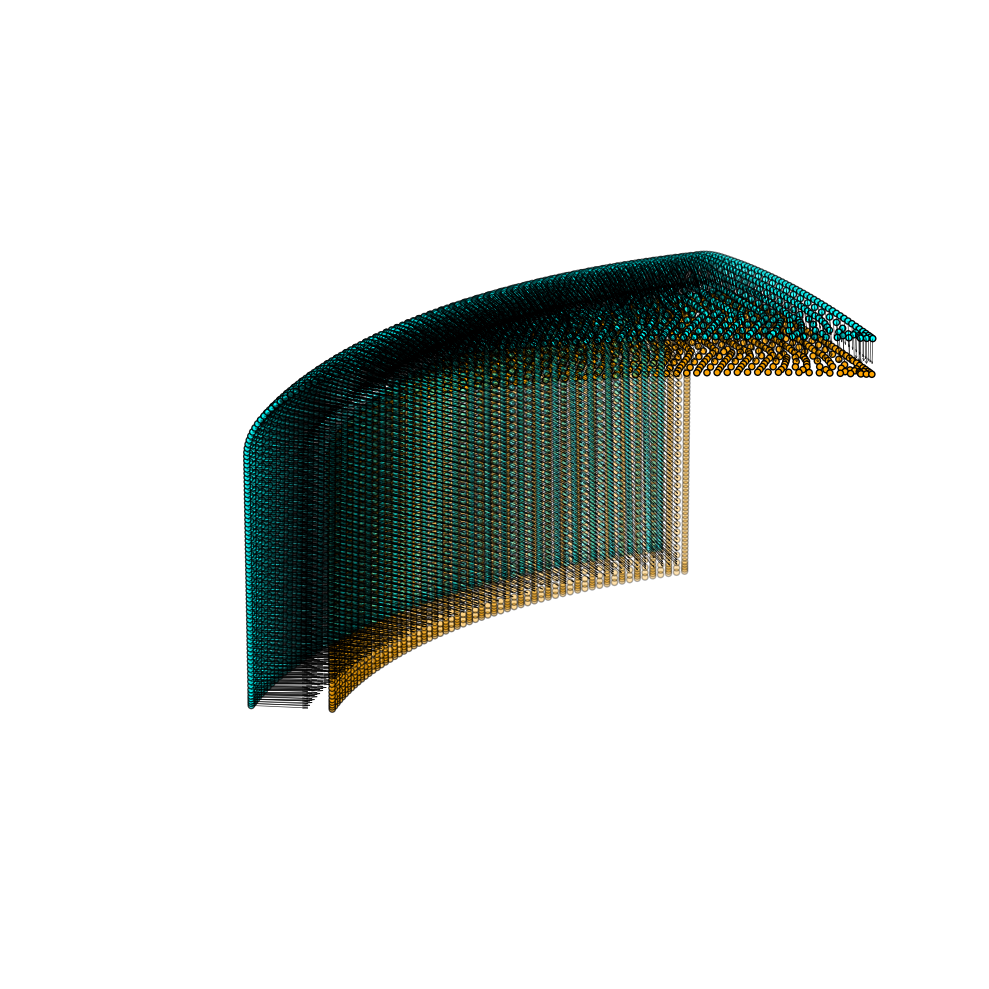

In [6]:
from matplotlib import pyplot as plt 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

dist_diag = np.linalg.norm(loc1.to_numpy() - loc2.to_numpy(),axis =1)

vec = loc2.to_numpy() - loc1.to_numpy()
ax.scatter(*[loc1.to_numpy()[:,i] for i in range(3)],edgecolor = 'k',facecolor = 'cyan', s = 20)
ax.scatter(*[loc2.to_numpy()[:,i] for i in range(3)],edgecolor = 'k',facecolor = 'orange', s = 20)


ax.quiver(*[loc1.to_numpy()[:,i] for i in range(3)],
            *[vec[:,i] for i in range(3)],length = 0.7,normalize = False,
            edgecolor = 'k',alpha = 0.8,linewidths = 0.5,
            arrow_length_ratio = 0.1)

ax.view_init(elev = 20,azim = 160)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_axis_off()

plt.tight_layout()